# 第7章 专用函数

本章涵盖以下内容：
- 排序和搜索；
- 特殊函数；
- 金融函数；
- 窗口函数。

## 7.1 排序

NumPy提供了多种排序函数，如下所示：
- sort函数返回排序后的数组；
- lexsort函数根据键值的字典序进行排序；
- argsort函数返回输入数组排序后的下标；
- ndarray类的sort方法可对数组进行原地排序；
- msort函数沿着第一个轴排序；
- sort_complex函数对复数按照先实部后虚部的顺序进行排序。  

在上面的列表中， argsort和sort函数可用来对NumPy数组类型进行排序。

## 7.2 动手实践：按字典序排序

　　NumPy中的lexsort函数返回输入数组按字典序排序后的下标。我们需要给lexsort函数提供排序所依据的键值数组或元组。步骤如下。

(1) 回顾一下第3章中我们使用的AAPL股价数据，现在我们要将这些很久以前的数据用在完全不同的地方。我们将载入收盘价和日期数据。是的，处理日期总是很复杂，我们为其准备了专门的转换函数。

In [6]:
def datestr2num(s):
    return datetime.datetime.strptime(s.decode("ascii"), "%d-%m-%Y").toordinal()

dates, closes = np.loadtxt('./Data/AAPL.csv', delimiter=',', usecols=(1, 6), converters={1: datestr2num}, unpack=True)

In [7]:
dates

array([ 734165.,  734168.,  734169.,  734170.,  734171.,  734172.,
        734175.,  734176.,  734177.,  734178.,  734179.,  734182.,
        734183.,  734184.,  734185.,  734186.,  734190.,  734191.,
        734192.,  734193.,  734196.,  734197.,  734198.,  734199.,
        734200.,  734203.,  734204.,  734205.,  734206.,  734207.])

In [8]:
closes

array([ 336.1 ,  339.32,  345.03,  344.32,  343.44,  346.5 ,  351.88,
        355.2 ,  358.16,  354.54,  356.85,  359.18,  359.9 ,  363.13,
        358.3 ,  350.56,  338.61,  342.62,  342.88,  348.16,  353.21,
        349.31,  352.12,  359.56,  360.  ,  355.36,  355.76,  352.47,
        346.67,  351.99])

(2) 使用lexsort函数排序。数据本身已经按照日期排序，不过我们现在优先按照收盘价排序：

In [13]:
indices = np.lexsort((dates, closes))

print("Indices", indices)
print(["%s %s" % (datetime.date.fromordinal(int(dates[i])), closes[i]) for i in indices])

Indices [ 0 16  1 17 18  4  3  2  5 28 19 21 15  6 29 22 27 20  9  7 25 26 10  8 14
 11 23 12 24 13]
['2011-01-28 336.1', '2011-02-22 338.61', '2011-01-31 339.32', '2011-02-23 342.62', '2011-02-24 342.88', '2011-02-03 343.44', '2011-02-02 344.32', '2011-02-01 345.03', '2011-02-04 346.5', '2011-03-10 346.67', '2011-02-25 348.16', '2011-03-01 349.31', '2011-02-18 350.56', '2011-02-07 351.88', '2011-03-11 351.99', '2011-03-02 352.12', '2011-03-09 352.47', '2011-02-28 353.21', '2011-02-10 354.54', '2011-02-08 355.2', '2011-03-07 355.36', '2011-03-08 355.76', '2011-02-11 356.85', '2011-02-09 358.16', '2011-02-17 358.3', '2011-02-14 359.18', '2011-03-03 359.56', '2011-02-15 359.9', '2011-03-04 360.0', '2011-02-16 363.13']


#### 刚才做了些什么

In [10]:
import numpy as np
import datetime

def datestr2num(s):
    return datetime.datetime.strptime(s.decode("ascii"), "%d-%m-%Y").toordinal()

dates, closes = np.loadtxt('./Data/AAPL.csv', delimiter=',', usecols=(1, 6), converters={1: datestr2num}, unpack=True)
indices = np.lexsort((dates, closes))

print("Indices", indices)
print(["%s %s" % (datetime.date.fromordinal(int(dates[i])), closes[i]) for i in indices])

Indices [ 0 16  1 17 18  4  3  2  5 28 19 21 15  6 29 22 27 20  9  7 25 26 10  8 14
 11 23 12 24 13]
['2011-01-28 336.1', '2011-02-22 338.61', '2011-01-31 339.32', '2011-02-23 342.62', '2011-02-24 342.88', '2011-02-03 343.44', '2011-02-02 344.32', '2011-02-01 345.03', '2011-02-04 346.5', '2011-03-10 346.67', '2011-02-25 348.16', '2011-03-01 349.31', '2011-02-18 350.56', '2011-02-07 351.88', '2011-03-11 351.99', '2011-03-02 352.12', '2011-03-09 352.47', '2011-02-28 353.21', '2011-02-10 354.54', '2011-02-08 355.2', '2011-03-07 355.36', '2011-03-08 355.76', '2011-02-11 356.85', '2011-02-09 358.16', '2011-02-17 358.3', '2011-02-14 359.18', '2011-03-03 359.56', '2011-02-15 359.9', '2011-03-04 360.0', '2011-02-16 363.13']


## 7.5 搜索

NumPy中有多个函数可以在数组中进行搜索，如下所示。

In [14]:
a = np.array([2, 4, 8])
np.argmax(a)

2

In [15]:
b = np.array([np.nan, 2, 4])
np.nanargmax(b)

2

In [16]:
np.argmax(b)

0

In [35]:
a = np.array([2,4,8])
np.argwhere(a <= 4)

array([[0],
       [1]], dtype=int64)

## 7.6 动手实践：使用 searchsorted 函数

　　searchsorted函数为指定的插入值返回一个在有序数组中的索引位置，从这个位置插入可以保持数组的有序性。下面的例子可以解释得更清楚。请完成如下步骤。

(1) 我们需要一个排序后的数组。使用arange函数创建一个升序排列的数组：

In [39]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

(2) 现在，我们来调用searchsorted函数：

In [41]:
indices = np.searchsorted(a, [-2, 7])
print("Indices", indices)

Indices [0 5]


(3) 使用insert函数构建完整的数组：

In [42]:
print("The full array", np.insert(a, indices, [-2, 7]))

The full array [-2  0  1  2  3  4  7]


#### 刚才做了些什么

In [36]:
import numpy as np

a = np.arange(5)
indices = np.searchsorted(a, [-2, 7])
print("Indices", indices)

print("The full array", np.insert(a, indices, [-2, 7]))

Indices [0 5]
The full array [-2  0  1  2  3  4  7]


## 7.7 数组元素抽取

　　NumPy的extract函数可以根据某个条件从数组中抽取元素。该函数和我们在第3章中遇到过的where函数相似。 nonzero函数专门用来抽取非零的数组元素。

## 7.8 动手实践：从数组中抽取元素

#### 刚才做了些什么

In [44]:
import numpy as np

a = np.arange(7)
condition = (a % 2) == 0
print("Even numberes", np.extract(condition, a))
print("Non zero", np.nonzero(a))

Even numberes [0 2 4 6]
Non zero (array([1, 2, 3, 4, 5, 6], dtype=int64),)


## 7.9 金融函数

## 7.33 sinc 函数

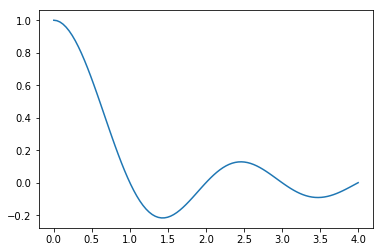

In [45]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 100)
vals = np.sinc(x)

plt.plot(x, vals)
plt.show()

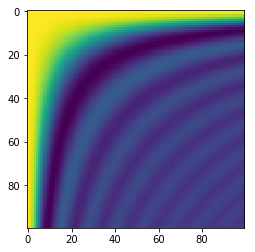

In [47]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 100)
xx = np.outer(x, x)
vals = np.sinc(xx)

plt.imshow(vals)
plt.show()

## 7.35 本章小结